# Автоматический курс валют в шаблоне ТАСС

## Загружаем необходимые бибилиотеки
Кажется, что их избыточно много, но без них все работает абы  как.

In [1]:
from pandas_datareader import data as pdr # для понимания дат
import datetime # для манипуляций с датами
from datetime import timedelta # для вычесления вчерашнего дня
import pandas as pd # для работы с данными
import yfinance as yf # для подключения к Yahoo Finance
import numpy as np # для вычислений
import matplotlib.pyplot as plt #для визуализации

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Работа с датами
Нам нужно определить сегодняшний и вчерашний день

In [3]:
start = '2014-01-01' # с этой дты начнется построение графика

In [4]:
# дату сегодняшнего дня я буду использовать в вычислениях

today = datetime.date.today()
print(today)

2020-04-03


In [5]:
day_before = datetime.date.today() - timedelta(days=10) #определяю вчерашний день
print(day_before)

2020-03-24


In [6]:
# определил текущее время до предыдущего часа 
# потом я буду это использовать в оформлении

now = datetime.datetime.now().strftime('%d.%m.%Y %H:%M') # strtime позволяет оформить время в любой формат
print(now)

03.04.2020 15:00


In [7]:
now2 = datetime.datetime.now().strftime('%Y%m%d%H%M') # другая форма записи для формирования имени файла png
print(now2)

202004031500


## Сбор данных
Используем доступ к Yahoo Finance

In [8]:
yf.pdr_override() # магия

In [9]:
# делаем запрос ежедневной статистики
# стоимости доллара и евро в рублях

finance = pdr.get_data_yahoo(["USDRUB=X","EURRUB=X"], start=start, end=today, interval='1d')
finance.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2013-12-31  45.134499  32.683201  45.134499  32.683201  45.402599  32.946602   
2014-01-01  45.213001  32.683201  45.213001  32.683201  45.213001  32.946602   
2014-01-02  45.213001  32.706001  45.213001  32.706001  45.299702  33.133999   
2014-01-03  45.194099  33.095200  45.194099  33.095200  45.245399  33.177700   
2014-01-06  45.109299  33.165001  45.109299  33.165001  45.342999  33.282902   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2013-12-31  45.002399  32.716202  45.177799  32.716202      0.0      0.0  
2014-01-01  45.213001  32.661999  45.213001  32.716202      0.0      0.0  
2014-01-02  44.986500  32.753201  45.213001  32.755199      0.0      0.0  
2014-01-03  44.870701  33.007702  45.206001  33.098701      0.0      0.0  
2014-01-06  44.200001  33.140202  44.200001  33.162498      0.0      0.0

In [10]:
# делаем запрос статистики с шагом в час
# с начала вчерашнего дня по текущий момент

fresh = pdr.get_data_yahoo(["USDRUB=X","EURRUB=X"], start=day_before, end=today, interval='1h')
fresh.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2020-03-23  85.302002  79.501701  85.302002  79.501701  85.366997  79.606499   
2020-03-23  85.331001  79.502403  85.331001  79.502403  85.492996  79.526604   
2020-03-23  85.276001  79.365898  85.276001  79.365898  85.466003  79.514999   
2020-03-24  86.037003  79.594200  86.037003  79.594200  86.037003  79.617401   
2020-03-24  85.677002  79.316299  85.677002  79.316299  86.019997  79.617302   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2020-03-23  85.302002  79.110001  85.328003  79.517502        0        0  
2020-03-23  85.110001  79.092003  85.292000  79.113998        0        0  
2020-03-23  84.955002  78.853996  85.339401  79.150002        0        0  
2020-03-24  85.373001  79.088997  85.438004  79.403000        0        0  
2020-03-24  85.502998  78.909302  86.019997  79.602303        0        0

In [11]:
# забираю из статистики с шагом в час
# самое последнее значение

fresh = fresh.iloc[[-1]]
fresh.head()

Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2020-04-03  82.766998  76.722099  82.766998  76.722099  82.766998  76.722099   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2020-04-03  82.766998  76.722099  82.766998  76.722099        0        0

## Манипуляции с данными
Данные нужно объединить

In [12]:
# объединяю таблицу ежедневной статистики
# с самым свежим сегодняшним значением

data = [finance, fresh]
data = pd.concat(data)
data

Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2013-12-31  45.134499  32.683201  45.134499  32.683201  45.402599  32.946602   
2014-01-01  45.213001  32.683201  45.213001  32.683201  45.213001  32.946602   
2014-01-02  45.213001  32.706001  45.213001  32.706001  45.299702  33.133999   
2014-01-03  45.194099  33.095200  45.194099  33.095200  45.245399  33.177700   
2014-01-06  45.109299  33.165001  45.109299  33.165001  45.342999  33.282902   
...               ...        ...        ...        ...        ...        ...   
2020-03-30  87.434196  78.652000  87.434196  78.652000  88.975998  80.382004   
2020-03-31  87.816803  79.589203  87.816803  79.589203  87.926399  79.690300   
2020-04-01  86.576103  78.414200  86.576103  78.414200  87.044296  79.309998   
2020-04-02  86.369598  78.666199  86.369598  78.666199  86.573601  79.196999   
2020-04-03  82.766998  76.722099  82.766998  76.722099  82.766998  76.722099   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2013-12-31  45.002399  32.716202  45.177799  32.716202      0.0      0.0  
2014-01-01  45.213001  32.661999  45.213001  32.716202      0.0      0.0  
2014-01-02  44.986500  32.753201  45.213001  32.755199      0.0      0.0  
2014-01-03  44.870701  33.007702  45.206001  33.098701      0.0      0.0  
2014-01-06  44.200001  33.140202  44.200001  33.162498      0.0      0.0  
...               ...        ...        ...        ...      ...      ...  
2020-03-30  87.434097  78.737503  87.434196  78.737503      0.0      0.0  
2020-03-31  85.403000  77.664497  87.788597  79.588898      0.0      0.0  
2020-04-01  85.681000  77.720001  86.566002  78.414200      0.0      0.0  
2020-04-02  84.093697  77.375999  86.259300  78.666199      0.0      0.0  
2020-04-03  82.766998  76.722099  82.766998  76.722099      0.0      0.0  

[1632 rows x 12 columns]

In [13]:
# мне не нужны все столбцы
# беру только "Закрытие"

data = data[['Close']]
data

Close           
             EURRUB=X   USDRUB=X
Date                            
2013-12-31  45.134499  32.683201
2014-01-01  45.213001  32.683201
2014-01-02  45.213001  32.706001
2014-01-03  45.194099  33.095200
2014-01-06  45.109299  33.165001
...               ...        ...
2020-03-30  87.434196  78.652000
2020-03-31  87.816803  79.589203
2020-04-01  86.576103  78.414200
2020-04-02  86.369598  78.666199
2020-04-03  82.766998  76.722099

[1632 rows x 2 columns]

## Предварительный просмотр
Смотрю все ли в порядке с данными

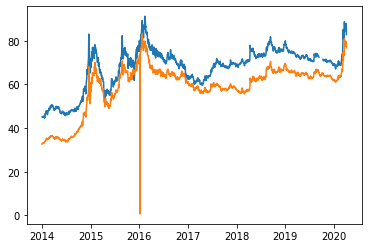

In [14]:
plt.plot(data)
plt.show()

Вижу резкий выброс очевидно ошибочных значений

## Удаление ошибочных значений
Мне нужно найти в какую дату были ошибки и удалить соответствующие строки

In [15]:
 # забираю в отдельную таблицу значения доллара

usd = data.loc[:,(slice(None),'USDRUB=X')]
usd

,Close
,USDRUB=X
Date,
2013-12-31,32.683201
2014-01-01,32.683201
2014-01-02,32.706001
2014-01-03,33.095200
2014-01-06,33.165001
...,...
2020-03-30,78.652000
2020-03-31,79.589203


In [16]:
usdmindate = usd.idxmin() # ищу дату минимального значения доллара
print(usdmindate)

Close  USDRUB=X   2016-01-06
dtype: datetime64[ns]


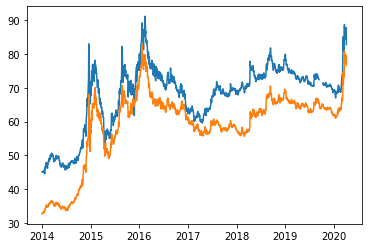

In [17]:
data = data.drop(usdmindate) # удаляю строку с этой датой из таблицы

plt.plot(data) # и проверяю графически
plt.show()

Ошибки нет. Миссия выполнена!

## Переменные для графика

In [18]:
# после фильтрации ошибочных данных мне снова нужна статистика только доллара и только евро

usd = data.loc[:,(slice(None),'USDRUB=X')]
euro = data.loc[:,(slice(None),'EURRUB=X')]

In [19]:
# евро и доллар будут меняться по оси Y
# по оси X у нас будет время в формате datetime

time = data.index
time

DatetimeIndex(['2013-12-31', '2014-01-01', '2014-01-02', '2014-01-03',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-13',
               ...
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03'],
              dtype='datetime64[ns]', name='Date', length=1631, freq=None)

In [20]:
# ищу данные для маркеров и подписей свежих значений

fresh = fresh[['Close']] # свежие значения закрытия 
freshtime = fresh.index # индекс и время последнего значения
print(freshtime[0])

2020-04-03 00:00:00


In [21]:
freshdollar = fresh.loc[:,(slice(None),'USDRUB=X')].values # последнее значение доллара
print(freshdollar[0][0])

76.72209930419922


In [22]:
fresheuro = fresh.loc[:,(slice(None),'EURRUB=X')].values # последнее значение евро
print(fresheuro[0][0])

82.76699829101562


In [23]:
# преобразую значение доллара и евро в нужный формат для вывода на экран

dollarprint = '{:.2f}'.format(freshdollar[0][0])
europrint = '{:.2f}'.format(fresheuro[0][0])

dollarprint = dollarprint.replace('.',',')
europrint = europrint.replace('.',',')

print('Доллар в нужном формате: ' + dollarprint)
print('Евро в нужном формате: ' + europrint)
print('Последнее обновление: ' + now) # на всякий случай вспоминаю про то что есть данные последнего обновления

Доллар в нужном формате: 76,72
Евро в нужном формате: 82,77
Последнее обновление: 03.04.2020 15:00


## Оформление графика
Теперь самое интересное. Такой график можно использовать, но одсознательно аудитория будет больше доверять единообразно оформленным визуальным коммуникациям. Диаграммы должны быть последовательно аккуратны и максимально понятны. Для этого, в качестве добавочной стоимости, используют различные приёмы графического дизайна

In [1]:
plt.rcParams['font.sans-serif'] = 'GOST UI 2' # меняю шрифт по-умолчанию

NameError: name 'plt' is not defined

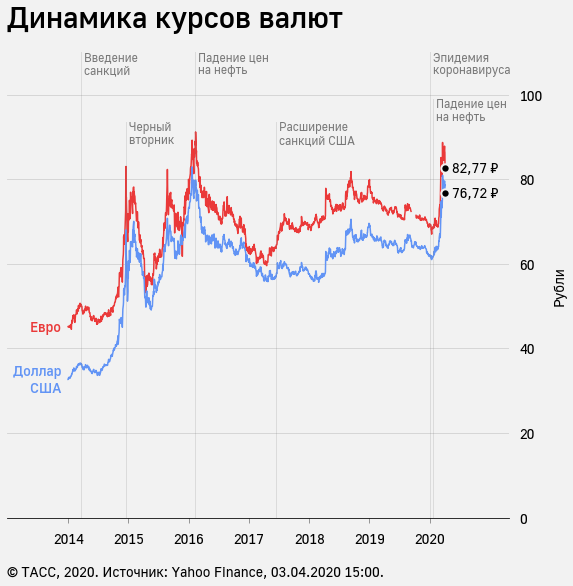

In [25]:
# создадим переменную fig и зададим ей размеры

fig = plt.figure(
    figsize=(9, 8.56),
    facecolor='#F2F2F2'
)

# поместим эт фигуру в переменную ax
# ax будет единственным графиком в модульной сетке
# за такую настройку отвечает add_subplot()

ax = fig.add_subplot()

# строим кривые изменения евро и доллара

ax.plot(time, euro, color='#EA3939')
ax.plot(time, usd, color='#6294F5')

# строим и задаем параметы точек последних значений

ax.scatter(freshtime, fresheuro, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)
ax.scatter(freshtime, freshdollar, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)

# у границ модуля есть настройки видимости
# я отключаю их кроме нижней линии оси Х

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

ax.yaxis.tick_right() # перемещаю макреры оси Y и их подписи слева направо

# делаю маркеры подписей невидимым, задав их толщине нулевое значение
# увеличиваю расстояние подписей от маркеров 

ax.tick_params(axis="x", length=5, pad=10, labelsize = 14, color = 'grey') 
ax.tick_params(axis="y", length=0, pad=10, labelsize = 14)

# указываю точные координаты расстановки зачечек на оси X

ax.set_xticks(['2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01'])

# указываю как эти зачечки подписать

ax.set_xticklabels(['2014','2015','2016','2017','2018','2019','2020'])

ax.grid(axis = 'y', color = 'grey', alpha = .3) # делаю видимыми сетки оси Y, настраиваю цвет и прозрачность

ax.axhline(y = 0, color = 'black', linewidth=1) # маловероятно, что значения будут отрицательными, но пусть эта линия будет

sumermax = 110 # максимальное значение оси Y

# далее идут подписи таймлайна. 
# их можно было бы забирать из таблицы и расставлять циклом
# но мне понадобилось ручное управление

ax.axvline(x = '2014-03-20', ymin = 0, ymax = 1,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2014-03-20', sumermax*1 - sumermax/60, ' Введение', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2014-03-20', sumermax*1 - sumermax/22, ' санкций', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2014-12-16', ymin = 0, ymax = .85,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2014-12-16', sumermax*.85 - sumermax/60, ' Черный', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2014-12-16', sumermax*.85 - sumermax/22, ' вторник', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2016-02-11', ymin = 0, ymax =  1,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2016-02-11', sumermax*1 - sumermax/60, ' Падение цен ', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2016-02-11', sumermax*1 - sumermax/22, ' на нефть ', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2017-6-14', ymin = 0, ymax = .85,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2017-6-14', sumermax*.85 - sumermax/60, ' Расширение', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2017-6-14', sumermax*.85 - sumermax/22, ' санкций США', fontsize=12, color='black', zorder=2.5, alpha = .5)


ax.axvline(x = '2019-12-31', ymin = 0, ymax = 1,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2019-12-31', sumermax*1 - sumermax/60, ' Эпидемия ', fontsize=12, color='black', zorder=2.5, alpha = .5,)
ax.text('2019-12-31', sumermax*1 - sumermax/22, ' коронавируса ', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2020-01-20', ymin = 0, ymax =  .9,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2020-01-20', sumermax*.9 - sumermax/60, ' Падение цен ', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2020-01-20', sumermax*.9 - sumermax/22, ' на нефть ', fontsize=12, color='black', zorder=2.5, alpha = .5)


ax.set_ylim(0, sumermax) # ось Y будет стоиться от нуля до максимума

ax.margins(x=.16) # настраиваю поля слева и справа по оси X

ax.set_title('Динамика курсов валют', fontweight = 'medium', fontsize=30, loc='left',pad=25) # настройка заголовка

credit_x = ax.get_xlim()[0] # крайнее левое значение оси X
credit_y = 0 - ax.get_ylim()[1]/8 #отступ копирайта и источника
size1 = (ax.get_ylim()[1] - ax.get_ylim()[0])
size2 = size1/10


# оформление подписей меток

ax.text(freshtime, fresheuro-1, '  ' + europrint +' ₽', fontsize=14)
ax.text(freshtime, freshdollar-1, '  ' + dollarprint + ' ₽', fontsize=14)

ax.text(start, usd.iloc[0]+1, ('Доллар  '), fontname = "GOST UI 2", fontsize=14, color='#6294F5', fontweight = 'medium', horizontalalignment='right')
ax.text(start, usd.iloc[0]-3, ('США  '), fontname = "GOST UI 2", fontsize=14, color='#6294F5', fontweight = 'medium', horizontalalignment='right')
ax.text(start, euro.iloc[0]-1, ('Евро  '), fontname = "GOST UI 2", fontsize=14, color='#EA3939', fontweight = 'medium', horizontalalignment='right')

ax.set_ylabel('Рубли', fontsize=14, labelpad=10)
ax.yaxis.set_label_position("right")

ax.text(credit_x, credit_y, ('© ТАСС, 2020. Источник: Yahoo Finance, '+now+'.'), fontsize=14)



ax.patch.set_facecolor('#F2F2F2') # цвет заливки зоны построения

# сохраняем фигуру

fig.savefig(
    'Exchange_Rates_TASS_'+ now2 + '.png', # имя и формат файла
    dpi=300, # ращрешение
    transparent = False, # отключил на всякий пожарный прозрачный
    bbox_inches = 'tight', # не очень понятно, но без этой настройки файл получается деформированым
    pad_inches = .5, # размер полей
    facecolor = '#F2F2F2' # цвет фона
)

plt.show()